In [1]:
import ccxt
import pandas as pd
import time
import sys
sys.path.append('../..')
import numpy as np
from datetime import datetime,timedelta
import mplfinance as mpf
import seaborn as sns
import matplotlib.pyplot as plt
binance=ccxt.binance({
            "apiKey":'apiKey',
            "secret":'apiKey',
        })
symbol='ETHUSDT'
tf='1m'

In [2]:
df=binance.fetch_ohlcv(symbol,tf,limit=1000)
df=pd.DataFrame(df)
df.columns=['timestamp','open','high','low','close','volume']
df['timestamp']=[datetime.fromtimestamp((x/1000)) for x in df['timestamp']]
df=df.set_index('timestamp')
df

,open,high,low,close,volume
timestamp,,,,,
2022-11-18 00:08:00,1206.40,1206.71,1205.73,1206.50,180.2192
2022-11-18 00:09:00,1206.50,1206.50,1204.72,1204.72,127.2414
2022-11-18 00:10:00,1204.73,1204.81,1203.83,1203.85,139.8487
2022-11-18 00:11:00,1203.86,1205.12,1203.48,1204.25,159.5152
2022-11-18 00:12:00,1204.24,1204.63,1204.00,1204.00,159.7496
...,...,...,...,...,...
2022-11-18 16:43:00,1213.32,1213.65,1213.12,1213.62,48.3889
2022-11-18 16:44:00,1213.62,1213.63,1213.07,1213.07,72.8914
2022-11-18 16:45:00,1213.08,1213.67,1212.75,1212.75,283.7162


In [3]:
df['candlesize']=df['high']-df['low']
df['candlesize']

timestamp
2022-11-18 00:08:00    0.98
2022-11-18 00:09:00    1.78
2022-11-18 00:10:00    0.98
2022-11-18 00:11:00    1.64
2022-11-18 00:12:00    0.63
                       ... 
2022-11-18 16:43:00    0.53
2022-11-18 16:44:00    0.56
2022-11-18 16:45:00    0.92
2022-11-18 16:46:00    1.37
2022-11-18 16:47:00    0.52
Name: candlesize, Length: 1000, dtype: float64

In [4]:
df['avg_size']=df['candlesize'].rolling(30).mean()
df['std_size']=df['candlesize'].rolling(30).std()
sigma=4
sigma2=4
df['bigcandle']=df['candlesize']>(df['avg_size'] + df['std_size']*sigma)
# for i,row in df.iterrows():
#     if df.at[i,'candlesize']>(df.at[i,'avg_size']+df.at[i,'std_size']*sigma2):
#         df.at[i,'bigcandle']=False
df

,open,high,low,close,volume,candlesize,avg_size,std_size,bigcandle
timestamp,,,,,,,,,
2022-11-18 00:08:00,1206.40,1206.71,1205.73,1206.50,180.2192,0.98,NaN,NaN,False
2022-11-18 00:09:00,1206.50,1206.50,1204.72,1204.72,127.2414,1.78,NaN,NaN,False
2022-11-18 00:10:00,1204.73,1204.81,1203.83,1203.85,139.8487,0.98,NaN,NaN,False
2022-11-18 00:11:00,1203.86,1205.12,1203.48,1204.25,159.5152,1.64,NaN,NaN,False
2022-11-18 00:12:00,1204.24,1204.63,1204.00,1204.00,159.7496,0.63,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...
2022-11-18 16:43:00,1213.32,1213.65,1213.12,1213.62,48.3889,0.53,0.977667,0.432839,False
2022-11-18 16:44:00,1213.62,1213.63,1213.07,1213.07,72.8914,0.56,0.981667,0.428229,False
2022-11-18 16:45:00,1213.08,1213.67,1212.75,1212.75,283.7162,0.92,0.965000,0.420236,False


In [5]:
df['highest']=df['high']
df['lowest']=df['low']
lasthigh=0
lastlow=30000
df['color']='black'
for i,row in df.iterrows():
    if df.at[i,'bigcandle']==True:df.at[i,'color']='red'
    if df.at[i,'highest']<lasthigh:df.at[i,'highest']=lasthigh
    if df.at[i,'lowest']>lastlow:df.at[i,'lowest']=lastlow
    lasthigh=df.at[i,'highest']
    lastlow=df.at[i,'lowest']
df['highlag1']=df['highest'].shift(1)
df['lowlag1']=df['lowest'].shift(1)
df

,open,high,low,close,volume,candlesize,avg_size,std_size,bigcandle,highest,lowest,color,highlag1,lowlag1
timestamp,,,,,,,,,,,,,,
2022-11-18 00:08:00,1206.40,1206.71,1205.73,1206.50,180.2192,0.98,NaN,NaN,False,1206.71,1205.73,black,NaN,NaN
2022-11-18 00:09:00,1206.50,1206.50,1204.72,1204.72,127.2414,1.78,NaN,NaN,False,1206.71,1204.72,black,1206.71,1205.73
2022-11-18 00:10:00,1204.73,1204.81,1203.83,1203.85,139.8487,0.98,NaN,NaN,False,1206.71,1203.83,black,1206.71,1204.72
2022-11-18 00:11:00,1203.86,1205.12,1203.48,1204.25,159.5152,1.64,NaN,NaN,False,1206.71,1203.48,black,1206.71,1203.83
2022-11-18 00:12:00,1204.24,1204.63,1204.00,1204.00,159.7496,0.63,NaN,NaN,False,1206.71,1203.48,black,1206.71,1203.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18 16:43:00,1213.32,1213.65,1213.12,1213.62,48.3889,0.53,0.977667,0.432839,False,1234.00,1196.27,black,1234.00,1196.27
2022-11-18 16:44:00,1213.62,1213.63,1213.07,1213.07,72.8914,0.56,0.981667,0.428229,False,1234.00,1196.27,black,1234.00,1196.27
2022-11-18 16:45:00,1213.08,1213.67,1212.75,1212.75,283.7162,0.92,0.965000,0.420236,False,1234.00,1196.27,black,1234.00,1196.27


In [6]:
df['newlow']=df['low']<df['lowlag1']
df['newhigh']=df['high']>df['highlag1']

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mplfinance/_styles.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style['base_mpl_style'])


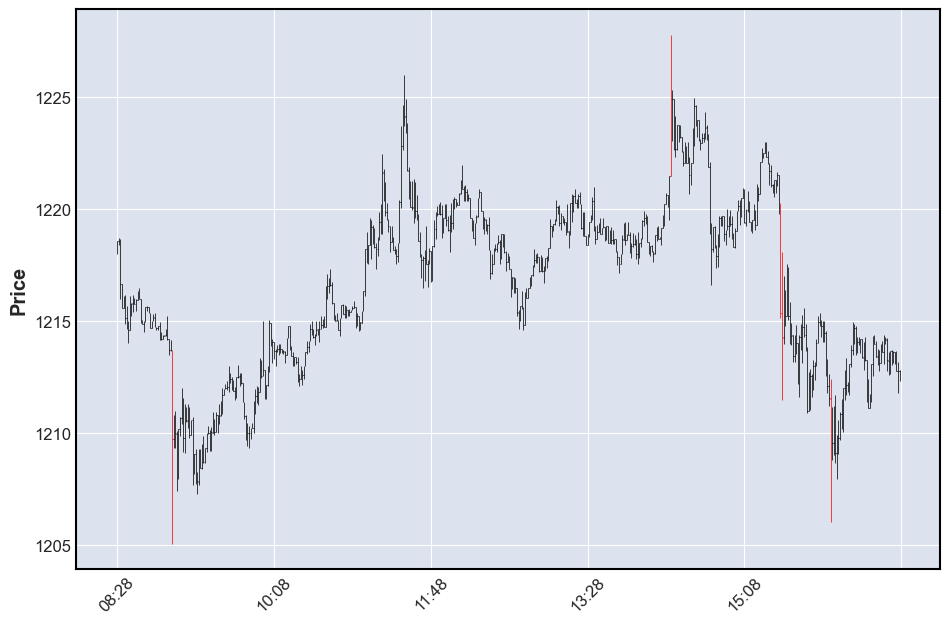

In [7]:
plotdf=df.iloc[-500:]
color_list=plotdf['color'].to_list()
mpf.plot(plotdf,marketcolor_overrides=color_list,figsize=(12,8))

In [8]:
df['logret']=np.log(df['close'])-np.log(df['close'].shift(1))
for i in range(100):
    df[f'cumreturn{i}min']=df['logret'].rolling(i).sum().shift(-i)
df

/var/folders/4l/7gq_zj8n3yz0tdj7wdwtvmcr0000gn/T/ipykernel_926/2982273958.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'cumreturn{i}min']=df['logret'].rolling(i).sum().shift(-i)
/var/folders/4l/7gq_zj8n3yz0tdj7wdwtvmcr0000gn/T/ipykernel_926/2982273958.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'cumreturn{i}min']=df['logret'].rolling(i).sum().shift(-i)
/var/folders/4l/7gq_zj8n3yz0tdj7wdwtvmcr0000gn/T/ipykernel_926/2982273958.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

,open,high,low,close,volume,candlesize,avg_size,std_size,bigcandle,highest,...,cumreturn90min,cumreturn91min,cumreturn92min,cumreturn93min,cumreturn94min,cumreturn95min,cumreturn96min,cumreturn97min,cumreturn98min,cumreturn99min
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-11-18 00:08:00,1206.40,1206.71,1205.73,1206.50,180.2192,0.98,NaN,NaN,False,1206.71,...,0.002649,0.003847,0.004631,0.004829,0.005249,0.005851,0.006189,0.005777,0.005282,0.005439
2022-11-18 00:09:00,1206.50,1206.50,1204.72,1204.72,127.2414,1.78,NaN,NaN,False,1206.71,...,0.005323,0.006107,0.006305,0.006726,0.007327,0.007665,0.007253,0.006759,0.006915,0.006511
2022-11-18 00:10:00,1204.73,1204.81,1203.83,1203.85,139.8487,0.98,NaN,NaN,False,1206.71,...,0.006830,0.007028,0.007448,0.008050,0.008388,0.007976,0.007481,0.007638,0.007234,0.007308
2022-11-18 00:11:00,1203.86,1205.12,1203.48,1204.25,159.5152,1.64,NaN,NaN,False,1206.71,...,0.006695,0.007116,0.007718,0.008055,0.007644,0.007149,0.007306,0.006902,0.006976,0.006720
2022-11-18 00:12:00,1204.24,1204.63,1204.00,1204.00,159.7496,0.63,NaN,NaN,False,1206.71,...,0.007324,0.007925,0.008263,0.007851,0.007357,0.007513,0.007109,0.007183,0.006928,0.006482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18 16:43:00,1213.32,1213.65,1213.12,1213.62,48.3889,0.53,0.977667,0.432839,False,1234.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-18 16:44:00,1213.62,1213.63,1213.07,1213.07,72.8914,0.56,0.981667,0.428229,False,1234.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-18 16:45:00,1213.08,1213.67,1212.75,1212.75,283.7162,0.92,0.965000,0.420236,False,1234.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for i,row in df.iterrows():
    if df.at[i,'bigcandle']==True and (df.at[i,'close']>df.at[i,'open'] and df.at[i,'cumreturn20min']<0):df.at[i,'color']='green'
    if df.at[i,'bigcandle']==True and (df.at[i,'close']<df.at[i,'open'] and df.at[i,'cumreturn20min']>0):df.at[i,'color']='green'

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mplfinance/_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mplfinance/_styles.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style['base_mpl_style'])


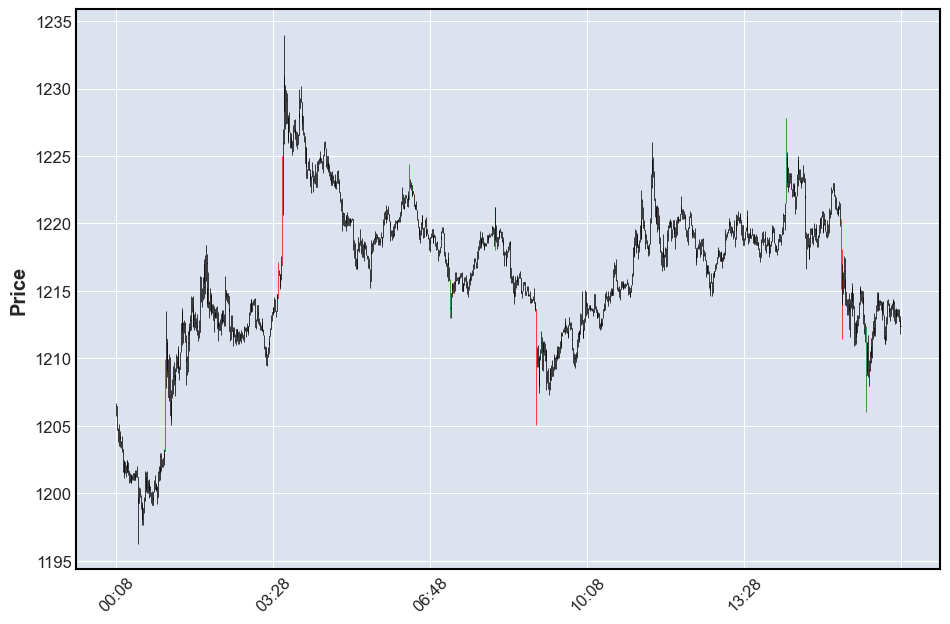

In [10]:
plotdf=df.iloc[-1000:]
colorList=plotdf['color'].to_list()
mpf.plot(plotdf,marketcolor_overrides=colorList,figsize=(12,8))

In [11]:
colorList=df['color'].to_list()
profitrate=colorList.count('green')-colorList.count('red')
profitrate
colorList.count('green') * 100 / (colorList.count('red')+colorList.count('green'))

45.45454545454545

In [12]:
upcandlereturn=df.loc[df['bigcandle']==True].loc[df['open']<df['close']].cumreturn20min.sum()
downcandlereturn=df.loc[df['bigcandle']==True].loc[df['open']>df['close']].cumreturn20min.sum()
print(f'log return sum of the next 10mins for upside moon candles: {upcandlereturn}, for downside moon candles: {downcandlereturn}')

log return sum of the next 10mins for upside moon candles: 0.009216895015581095, for downside moon candles: 0.0013385159446910322


/var/folders/4l/7gq_zj8n3yz0tdj7wdwtvmcr0000gn/T/ipykernel_926/3012121786.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  downMeanValues=downMoonCandles.mean().to_numpy()
/var/folders/4l/7gq_zj8n3yz0tdj7wdwtvmcr0000gn/T/ipykernel_926/3012121786.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  upMeanValues=upMoonCandles.mean().to_numpy()


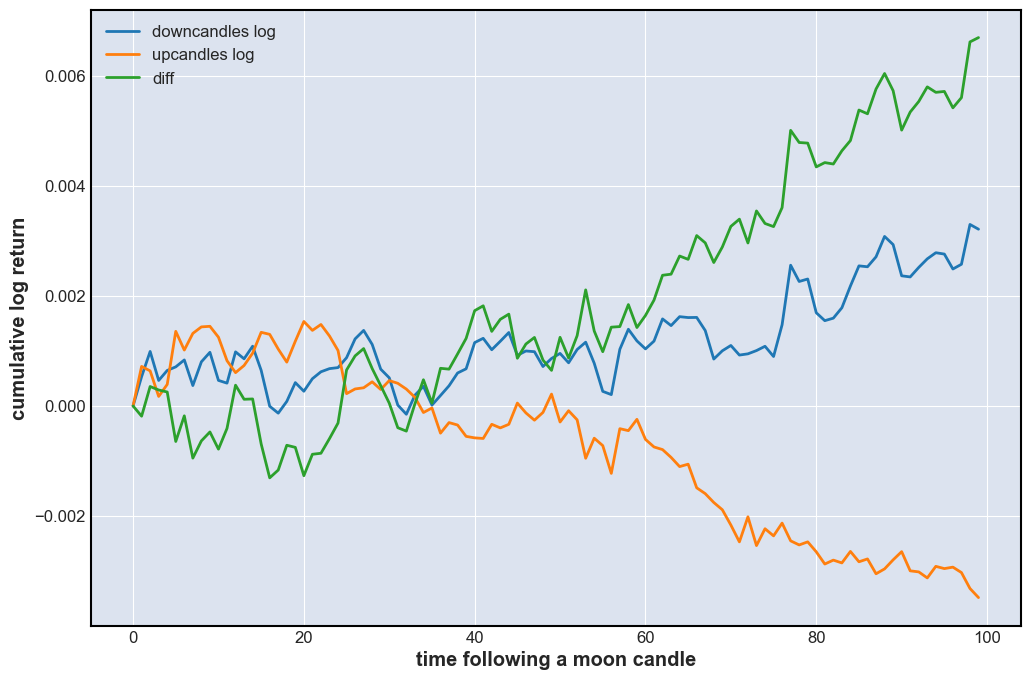

In [13]:
downMoonCandles=df[df['bigcandle']==True].loc[df['open']>df['close']]
upMoonCandles=df[df['bigcandle']==True].loc[df['open']<df['close']]
downMeanValues=downMoonCandles.mean().to_numpy()
upMeanValues=upMoonCandles.mean().to_numpy()
downMeanValues=downMeanValues[16:]
upMeanValues=upMeanValues[16:]
plt.figure(figsize=(12,8))
plt.plot(downMeanValues,label='downcandles log')
plt.plot(upMeanValues,label='upcandles log')
plt.plot(downMeanValues-upMeanValues,label='diff')
plt.xlabel('time following a moon candle')
plt.ylabel('cumulative log return')
plt.legend()

In [14]:
df[df['bigcandle']==False]

,open,high,low,close,volume,candlesize,avg_size,std_size,bigcandle,highest,...,cumreturn90min,cumreturn91min,cumreturn92min,cumreturn93min,cumreturn94min,cumreturn95min,cumreturn96min,cumreturn97min,cumreturn98min,cumreturn99min
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-11-18 00:08:00,1206.40,1206.71,1205.73,1206.50,180.2192,0.98,NaN,NaN,False,1206.71,...,0.002649,0.003847,0.004631,0.004829,0.005249,0.005851,0.006189,0.005777,0.005282,0.005439
2022-11-18 00:09:00,1206.50,1206.50,1204.72,1204.72,127.2414,1.78,NaN,NaN,False,1206.71,...,0.005323,0.006107,0.006305,0.006726,0.007327,0.007665,0.007253,0.006759,0.006915,0.006511
2022-11-18 00:10:00,1204.73,1204.81,1203.83,1203.85,139.8487,0.98,NaN,NaN,False,1206.71,...,0.006830,0.007028,0.007448,0.008050,0.008388,0.007976,0.007481,0.007638,0.007234,0.007308
2022-11-18 00:11:00,1203.86,1205.12,1203.48,1204.25,159.5152,1.64,NaN,NaN,False,1206.71,...,0.006695,0.007116,0.007718,0.008055,0.007644,0.007149,0.007306,0.006902,0.006976,0.006720
2022-11-18 00:12:00,1204.24,1204.63,1204.00,1204.00,159.7496,0.63,NaN,NaN,False,1206.71,...,0.007324,0.007925,0.008263,0.007851,0.007357,0.007513,0.007109,0.007183,0.006928,0.006482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18 16:43:00,1213.32,1213.65,1213.12,1213.62,48.3889,0.53,0.977667,0.432839,False,1234.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-18 16:44:00,1213.62,1213.63,1213.07,1213.07,72.8914,0.56,0.981667,0.428229,False,1234.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-18 16:45:00,1213.08,1213.67,1212.75,1212.75,283.7162,0.92,0.965000,0.420236,False,1234.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
